# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

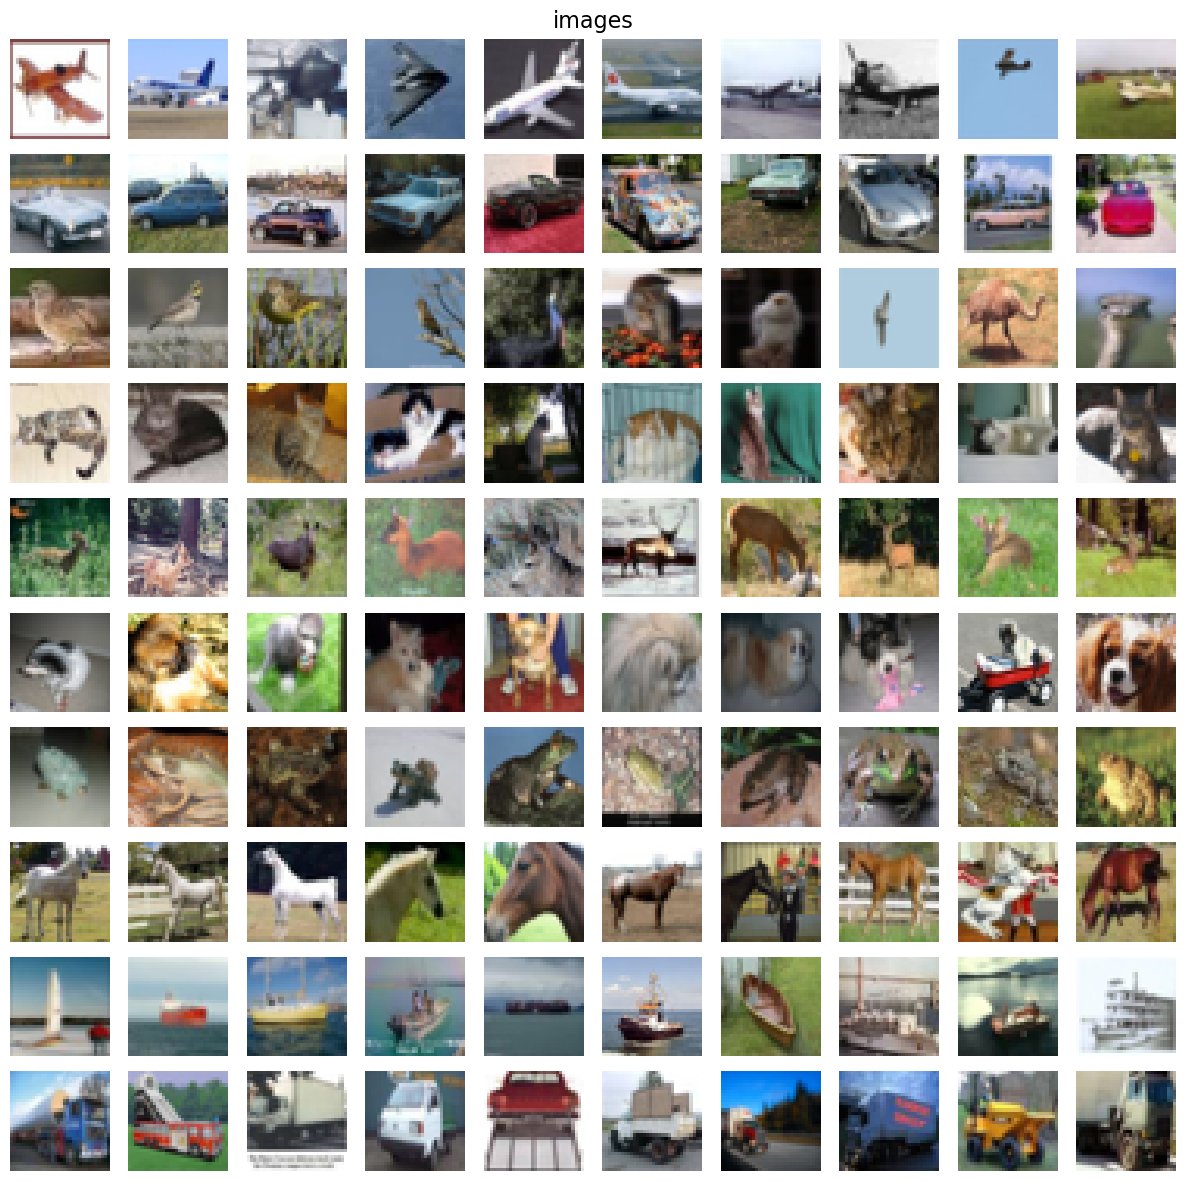

In [23]:
y_train = y_train.flatten() 

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(12, 12))


for class_idx in range(10):
    class_images = x_train[y_train == class_idx]
    selected_images = class_images[np.random.choice(class_images.shape[0], 10, replace=False)]
    
    for i in range(10):
        plt_idx = class_idx * 10 + i + 1
        plt.subplot(10, 10, plt_idx)
        plt.imshow(selected_images[i])
        plt.axis("off")
        if i == 0:
            plt.ylabel(class_names[class_idx], fontsize=9)

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

x_train_norm = x_train.astype("float32") / 255.0
x_test_norm = x_test.astype("float32") / 255.0

plt.suptitle("images", fontsize=16)
plt.tight_layout()
plt.show()

# Your code here :

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [24]:
from keras.backend import clear_session
clear_session()

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])# Your code here :

c:\Users\megap\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [26]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train_norm, y_train_cat,
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2)# Your code here :

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.1328 - loss: 2.2769 - val_accuracy: 0.2304 - val_loss: 2.1893
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.2442 - loss: 2.1615 - val_accuracy: 0.2602 - val_loss: 2.0948
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.2916 - loss: 2.0539 - val_accuracy: 0.2900 - val_loss: 2.0173
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.3172 - loss: 1.9786 - val_accuracy: 0.2149 - val_loss: 2.0744
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.3232 - loss: 1.9318 - val_accuracy: 0.3216 - val_loss: 1.9276
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3464 - loss: 1.8823 - val_accuracy: 0.2901 - val_loss: 1.9557
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.3578 - loss: 1.8473 - val_accuracy: 0.2864 - val_loss: 2.0062
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.3646 - loss: 1.8343 - val_accuracy: 0.3400 - v

*   Plot the cross entropy loss curve and the accuracy curve

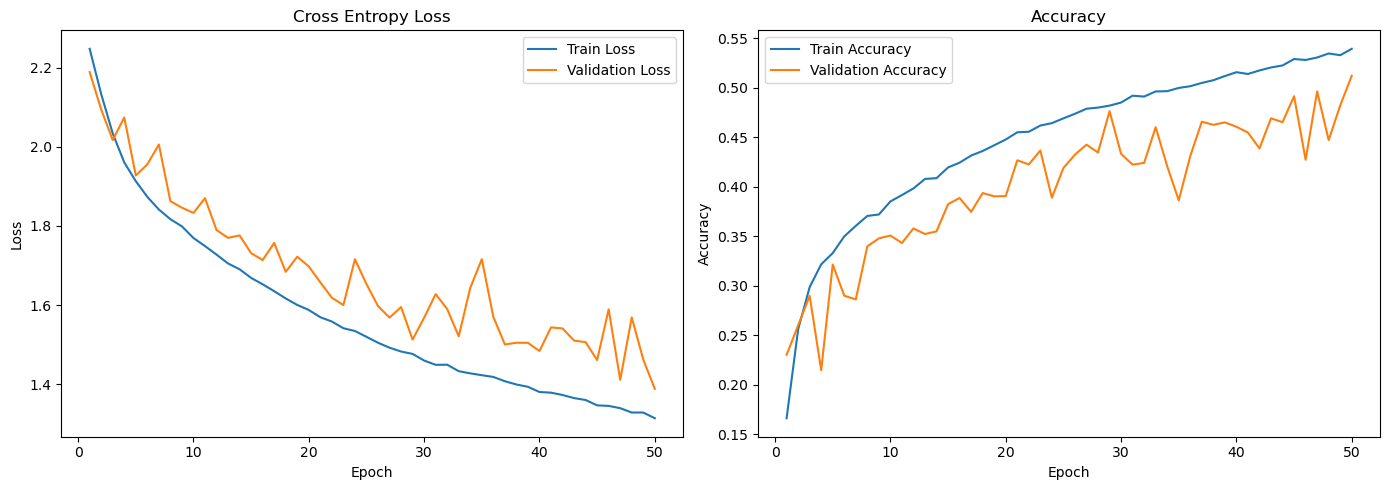

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()# Your code here :

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [28]:
from keras.backend import clear_session
clear_session()

In [29]:
vgg_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [30]:
vgg_model.compile(optimizer=SGD(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


vgg_history = vgg_model.fit(x_train_norm, y_train_cat,
                            epochs=50,
                            batch_size=512,
                            validation_split=0.2)# Your code here :

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - accuracy: 0.1652 - loss: 2.2730 - val_accuracy: 0.2540 - val_loss: 2.1566
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - accuracy: 0.2660 - loss: 2.1084 - val_accuracy: 0.2464 - val_loss: 2.1384
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.2870 - loss: 2.0106 - val_accuracy: 0.2584 - val_loss: 2.0408
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - accuracy: 0.3118 - loss: 1.9577 - val_accuracy: 0.2892 - val_loss: 2.0197
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.3321 - loss: 1.8998 - val_accuracy: 0.3003 - val_loss: 1.9246
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.3466 - loss: 1.8573 - val_accuracy: 0.3287 - val_loss: 1.8798
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.3531 - loss: 1.8434 - val_accuracy: 0.3285 - val_loss: 1.8897
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.3713 - loss: 1.8076 - val_accu

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

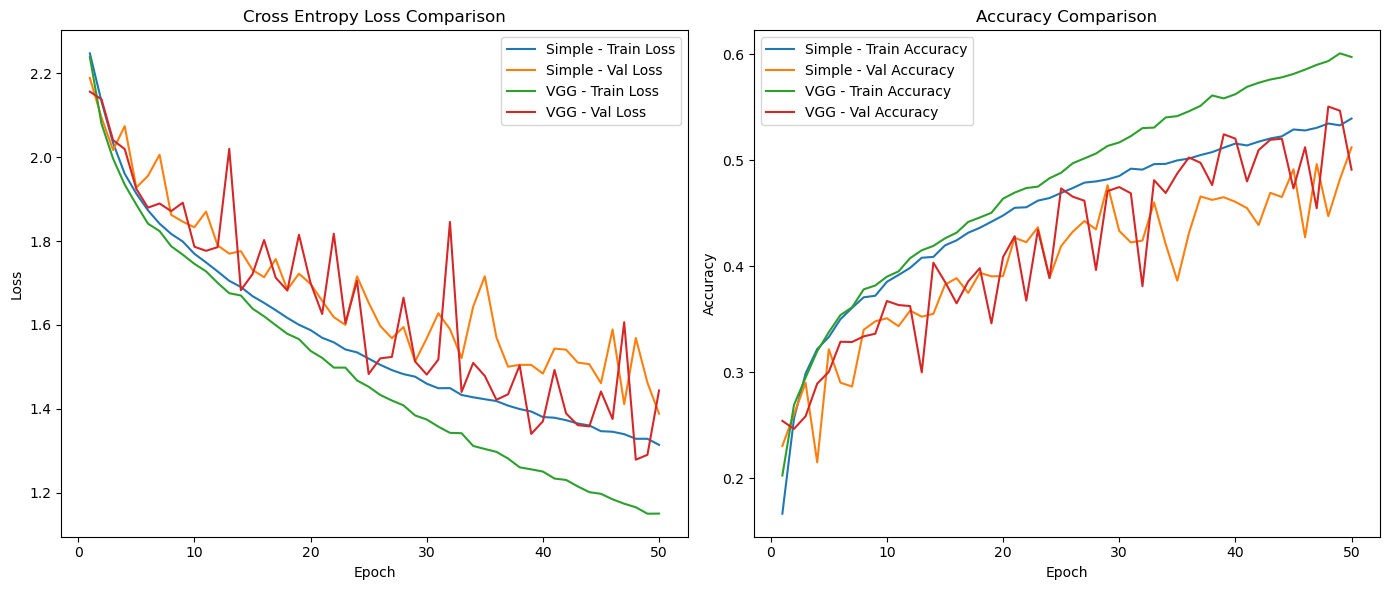

In [31]:
acc1 = history.history['accuracy']
val_acc1 = history.history['val_accuracy']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2 = vgg_history.history['accuracy']
val_acc2 = vgg_history.history['val_accuracy']
loss2 = vgg_history.history['loss']
val_loss2 = vgg_history.history['val_loss']

epochs = range(1, len(acc1) + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss1, label='Simple - Train Loss')
plt.plot(epochs, val_loss1, label='Simple - Val Loss')
plt.plot(epochs, loss2, label='VGG - Train Loss')
plt.plot(epochs, val_loss2, label='VGG - Val Loss')
plt.title('Cross Entropy Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc1, label='Simple - Train Accuracy')
plt.plot(epochs, val_acc1, label='Simple - Val Accuracy')
plt.plot(epochs, acc2, label='VGG - Train Accuracy')
plt.plot(epochs, val_acc2, label='VGG - Val Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()# Your code here :

The deeper model performs better, it has less loss and better accuracy,especially because it has more convulotional layers and more parameters. But on the other hand it takes much more time to train.

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Figure size 1000x800 with 0 Axes>

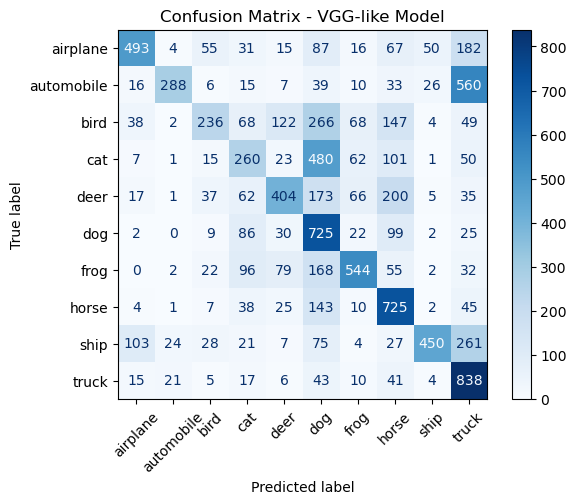

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = vgg_model.predict(x_test_norm)

y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
])

plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - VGG-like Model")
plt.show()# Your code here :

it confuses a truck with a car and some animals. I think that its some normal mistakes between some look alike classes


*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [33]:
test_loss, test_accuracy = vgg_model.evaluate(x_test_norm, y_test_cat)

print(f"Test Accuracy: {test_accuracy:.4f}")# Your code here :

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4945 - loss: 1.4180
Test Accuracy: 0.4963


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [34]:
from keras.backend import clear_session
clear_session()

In [37]:
vgg_full_model = Sequential([

    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

  
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

   
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),


    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])# Your code here :

c:\Users\megap\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 483s 6s/step - accuracy: 0.1167 - loss: 2.3001 - val_accuracy: 0.1693 - val_loss: 2.2928
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 486s 6s/step - accuracy: 0.1631 - loss: 2.2891 - val_accuracy: 0.1865 - val_loss: 2.2690
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 477s 6s/step - accuracy: 0.1879 - loss: 2.2538 - val_accuracy: 0.1599 - val_loss: 2.2347
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 513s 6s/step - accuracy: 0.2052 - loss: 2.1607 - val_accuracy: 0.2337 - val_loss: 2.1418
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 80609s 1033s/step - accuracy: 0.2502 - loss: 2.0983 - val_accuracy: 0.2839 - val_loss: 1.9997
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 453s 6s/step - accuracy: 0.2808 - loss: 2.0239 - val_accuracy: 0.3126 - val_loss: 1.9425
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 489s 6s/step - accuracy: 0.3125 - loss: 1.9503 - val_accuracy: 0.2382 - val_loss: 2.0970
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 511s 6s/step - accuracy: 0.3262 - loss: 1.9024 - val_accuracy: 0.231

<Figure size 1000x800 with 0 Axes>

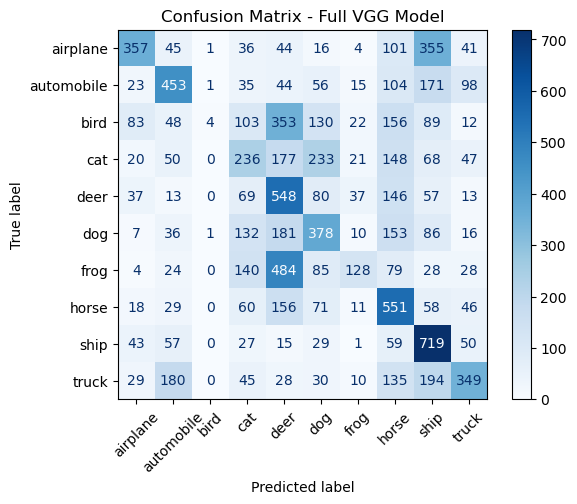

In [45]:

from tensorflow.image import resize
import tensorflow as tf


vgg_full_model.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


x_train_resized = tf.image.resize(x_train_norm, [64, 64]).numpy()
x_test_resized = tf.image.resize(x_test_norm, [64, 64]).numpy()


vgg_full_history = vgg_full_model.fit(
    x_train_resized,
    y_train_cat,
    epochs=10,
    batch_size=512,
    validation_split=0.2
)


y_pred_probs_full = vgg_full_model.predict(x_test_resized)
y_pred_full = np.argmax(y_pred_probs_full, axis=1)
y_true = np.argmax(y_test_cat, axis=1)


cm_full = confusion_matrix(y_true, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_full, display_labels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
])

plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - Full VGG Model")
plt.show()# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

The activation functions give the network non-linearity. Without them the network doesnt have the capacity to learn more complex things

_

2 - Key Differences between sigmoid and softmax:

Sigmoid function is used for binary classification problems and softmax is used for multi-class classification problems

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary crossentropy is used for binary problems with sigmoid and categorical cross entropy is used for multi-class problems with softmax
_
